# Transformaciones no lineales

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.stats import skew

array([2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2])

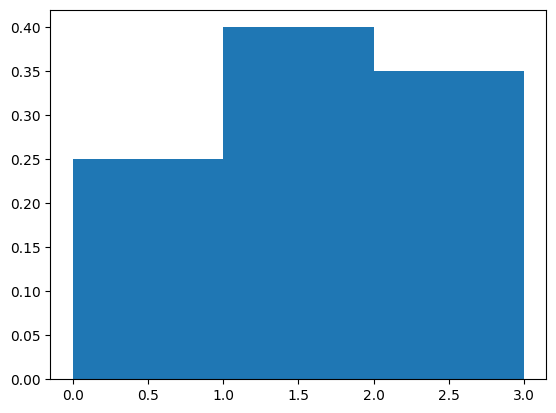

In [2]:
# Funcionamiento de los parámetros de la función hist
array = np.random.randint(0, 3, 20)
plt.hist(array, bins=3, range=(0.0,3.0), density=True)
array

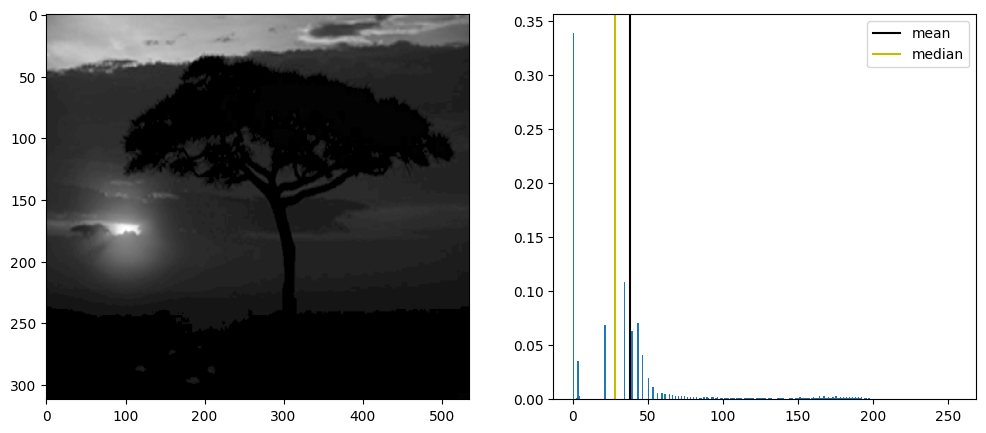

In [3]:
img = cv2.imread('imagenes/atardecer.png', cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1,2, figsize=(12,5))

ax = axs.ravel()

ax[0].imshow(img, cmap='gray', aspect='auto')

histograma_nomalizado = ax[1].hist(img.ravel(), bins=256, range=(0.0, 256.0), density=True)

ax[1].axvline(x = img.mean(), color = 'k', label = 'mean')
ax[1].axvline(x = np.median(img), color = 'y', label = 'median')

ax[1].legend()

plt.show()

In [4]:
mean = np.sum(histograma_nomalizado[0]*histograma_nomalizado[1][0:256])
std =  np.sqrt(np.sum(histograma_nomalizado[0]*(histograma_nomalizado[1][0:256] - mean)**2))
skewness = (np.sum(histograma_nomalizado[0]*(histograma_nomalizado[1][0:256] - mean)**3) / (std**3))
skewness_midpoint =(np.sum(histograma_nomalizado[0]*(histograma_nomalizado[1][0:256] - 127)**3) / (std**3))

print(f'La media de los niveles de intensidad de la imagen es {mean}')
print(f'La desviación estándar es {std}')
print(f'La asimetría respecto a la media es {skewness}')
print(f'La asimetría respecto al punto medio es {skewness_midpoint}')
print('\n')
print(f'La media de los niveles de intensidad de la imagen es {img.mean()}')
print(f'La desviación estándar es {img.std()}')
print(f'La asimetría respecto a la media es {skew(img.ravel())}')
print(f'La asimetría respecto al punto medio es {skewness_midpoint}')

La media de los niveles de intensidad de la imagen es 38.30768032590463
La desviación estándar es 48.46676559586579
La asimetría respecto a la media es 1.7673912675893033
La asimetría respecto al punto medio es -9.850594681939047


La media de los niveles de intensidad de la imagen es 38.30768032590463
La desviación estándar es 48.46676559586579
La asimetría respecto a la media es 1.7673912675893038
La asimetría respecto al punto medio es -9.850594681939047


| ![nonlineartransform](imagenes\no-lineal.png) | 
|:--:| 
| *Transformación no lineal* |

| ![nonlineartransform2](imagenes\no-lineal2.png) | 
|:--:| 
| *Ejemplos de transformaciones no lineales* |

Los casos mostrados arriba son idealizados. Este tipo de funciones generalmente se aplican sobre valores entre 0 y 1 para controlar la exponencialidad.

## Una implementación de la parábola: $ax^2+bx+c$

In [5]:
def apply_f_on_rgb(img, f, args):
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    return res

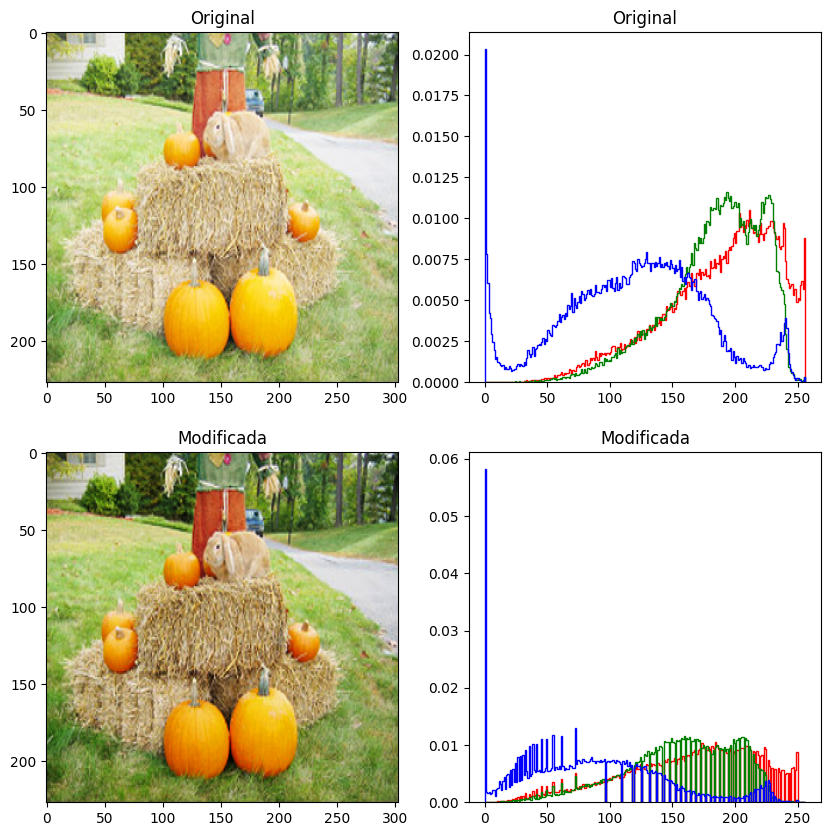

In [6]:
def non_linear_parabola(img, a, b, c):
    img_copy = img.astype(np.float32)/255.0

    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)

    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)

    return res

a = 0.6
b = 0.4
c = -0.02

img = cv2.cvtColor(cv2.imread('imagenes/calabazas.png'), cv2.COLOR_BGR2RGB)
img_modificada = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

imagenes_png = [img, img_modificada]
labels = ['Original', 'Modificada']

fig, axs = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

ax = axs.ravel()

contador = 0
for imagen, label in zip(imagenes_png, labels):
    ax[contador].set_title(label)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color)
    contador += 1

plt.show()

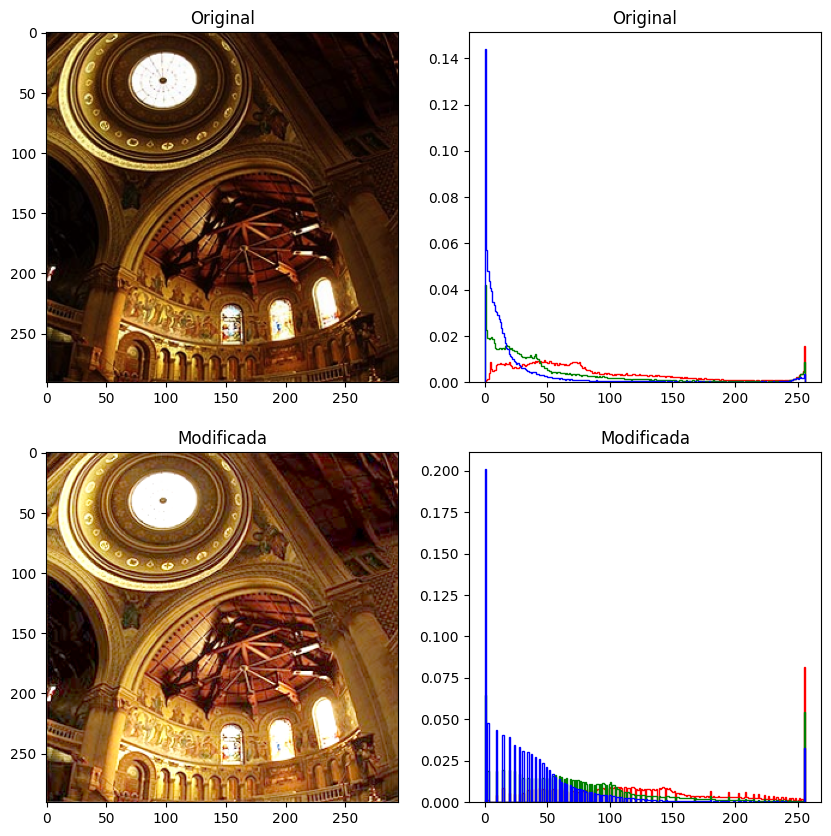

In [7]:
def non_linear_root(img, a, b):
    img_copy = img.copy().astype(np.float32)/255.0

    res_a = cv2.pow(img_copy,0.5)
    res_a = cv2.multiply(res_a, a)
    res = cv2.add(res_a,b)

    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

a = 1.25
b = -0.1

img = cv2.cvtColor(cv2.imread('imagenes/techo.png'), cv2.COLOR_BGR2RGB)

img_modificada = apply_f_on_rgb(img, non_linear_root, [a, b])

imagenes_png = [img, img_modificada]
labels = ['Original', 'Modificada']

fig, axs = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

ax = axs.ravel()

contador = 0
for imagen, label in zip(imagenes_png, labels):
    ax[contador].set_title(label)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color)
    contador += 1

plt.show()

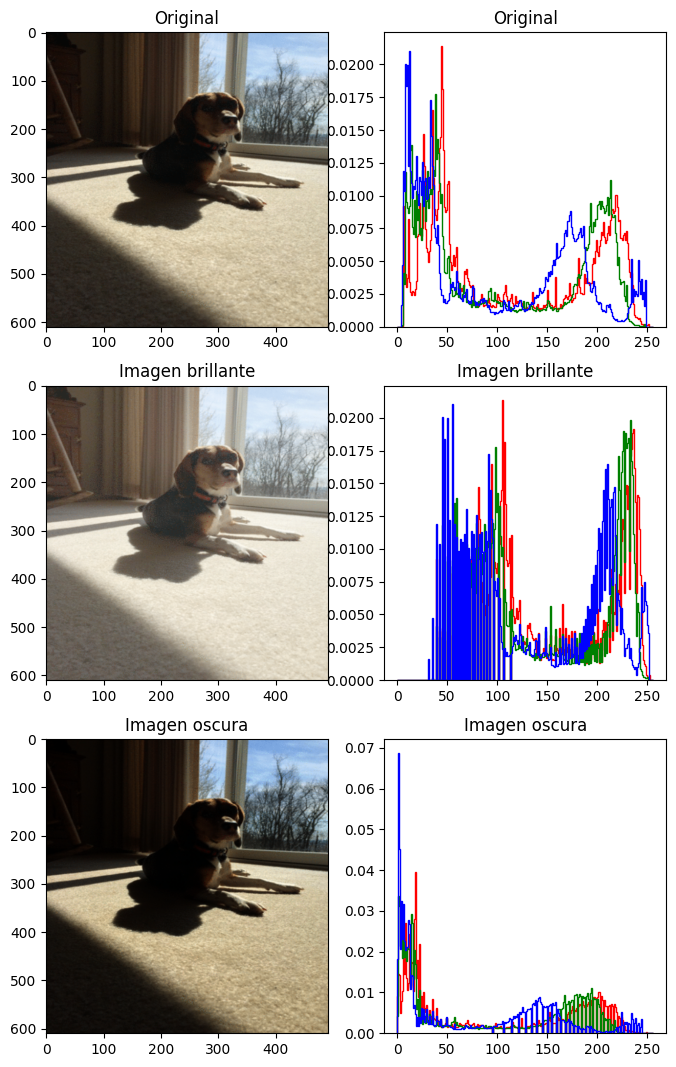

In [8]:
def gamma_correction(img, a, gamma):
    img_copy = img.copy().astype(np.float32)/255.0

    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)

    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255

    res = res.astype(np.uint8)

    return res

img = cv2.cvtColor(cv2.imread('imagenes/dog.png'), cv2.COLOR_BGR2RGB)

a = 1
gamma = 0.5

img_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

a = 1
gamma = 1.5

img_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

imagenes_png = [img, img_brillante, img_oscuro]
labels = ['Original', 'Imagen brillante', 'Imagen oscura']

fig, axs = plt.subplots(3,2, figsize=(8, 13))
colors = ('r','g','b')

ax = axs.ravel()

contador = 0
for imagen, label in zip(imagenes_png, labels):
    ax[contador].set_title(label)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color)
    contador += 1

plt.show()

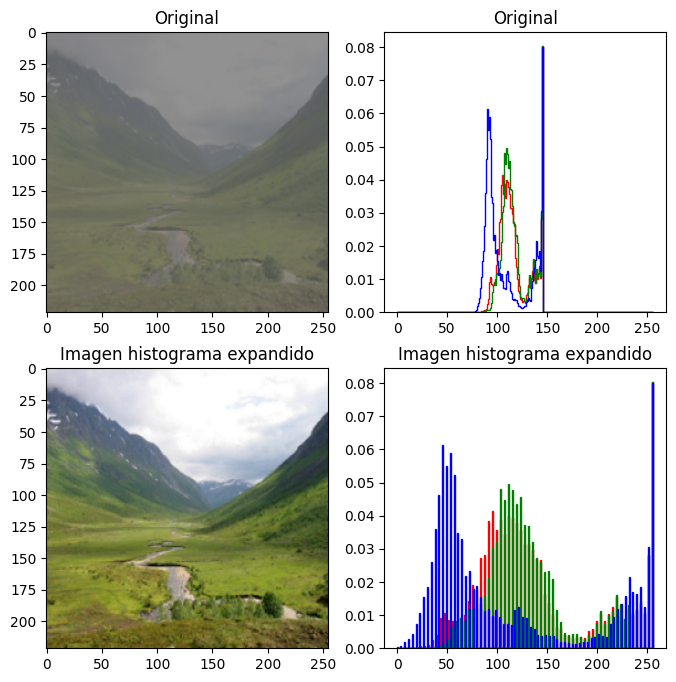

In [9]:
def histogram_expansion(img):
    m = float(np.min(img))
    M = float(np.max(img))

    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('imagenes/valle.png'), cv2.COLOR_BGR2RGB)

img_hist_expandido = apply_f_on_rgb(img, histogram_expansion, [])

imagenes_png = [img, img_hist_expandido]
labels = ['Original', 'Imagen histograma expandido']

fig, axs = plt.subplots(2,2, figsize=(8, 8))
colors = ('r','g','b')

ax = axs.ravel()

contador = 0
for imagen, label in zip(imagenes_png, labels):
    ax[contador].set_title(label)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color)
    contador += 1

plt.show()

<Figure size 640x480 with 0 Axes>

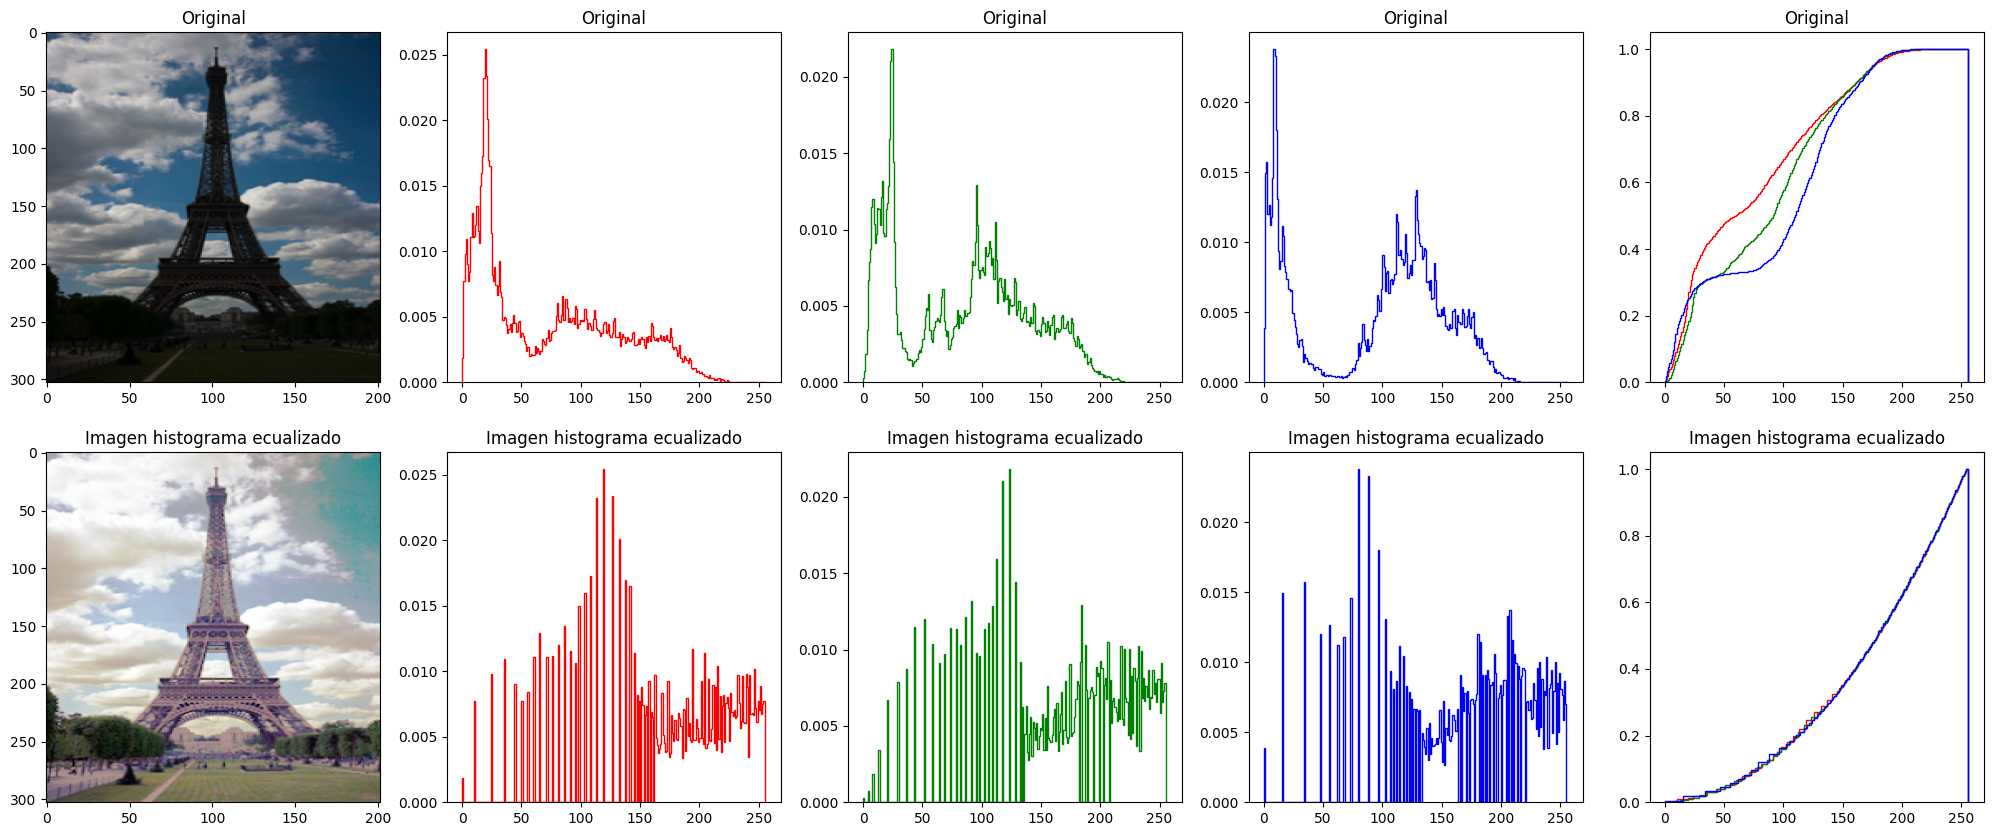

In [10]:
def histogram_equalization(img):

    img_raveled = img.ravel()
    hist_norm = plt.hist(img_raveled, bins=256, range=(0.0, 256.0), density=True, histtype='stepfilled')

    plt.clf()

    pdf = hist_norm[0]

    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]

    gmin = np.min(img)
    gmax = np.max(img)

    res = np.zeros(img.shape, np.float32)
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g]**0.5 + gmin

    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

img = cv2.cvtColor(cv2.imread('imagenes/eiffel.png'), cv2.COLOR_BGR2RGB)
hist_ecualization = apply_f_on_rgb(apply_f_on_rgb(img, histogram_expansion, []), histogram_equalization, [])

imagenes_png = [img, hist_ecualization]
labels = ['Original', 'Imagen histograma ecualizado']

fig, axs = plt.subplots(2,5, figsize=(25, 10))
colors = ('r','g','b')

ax = axs.ravel()

contador = 0
for imagen, label in zip(imagenes_png, labels):
    ax[contador].set_title(label)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color)
        contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color, cumulative=True)
    contador += 1

plt.show()

## Con cv2.equalizeHist()

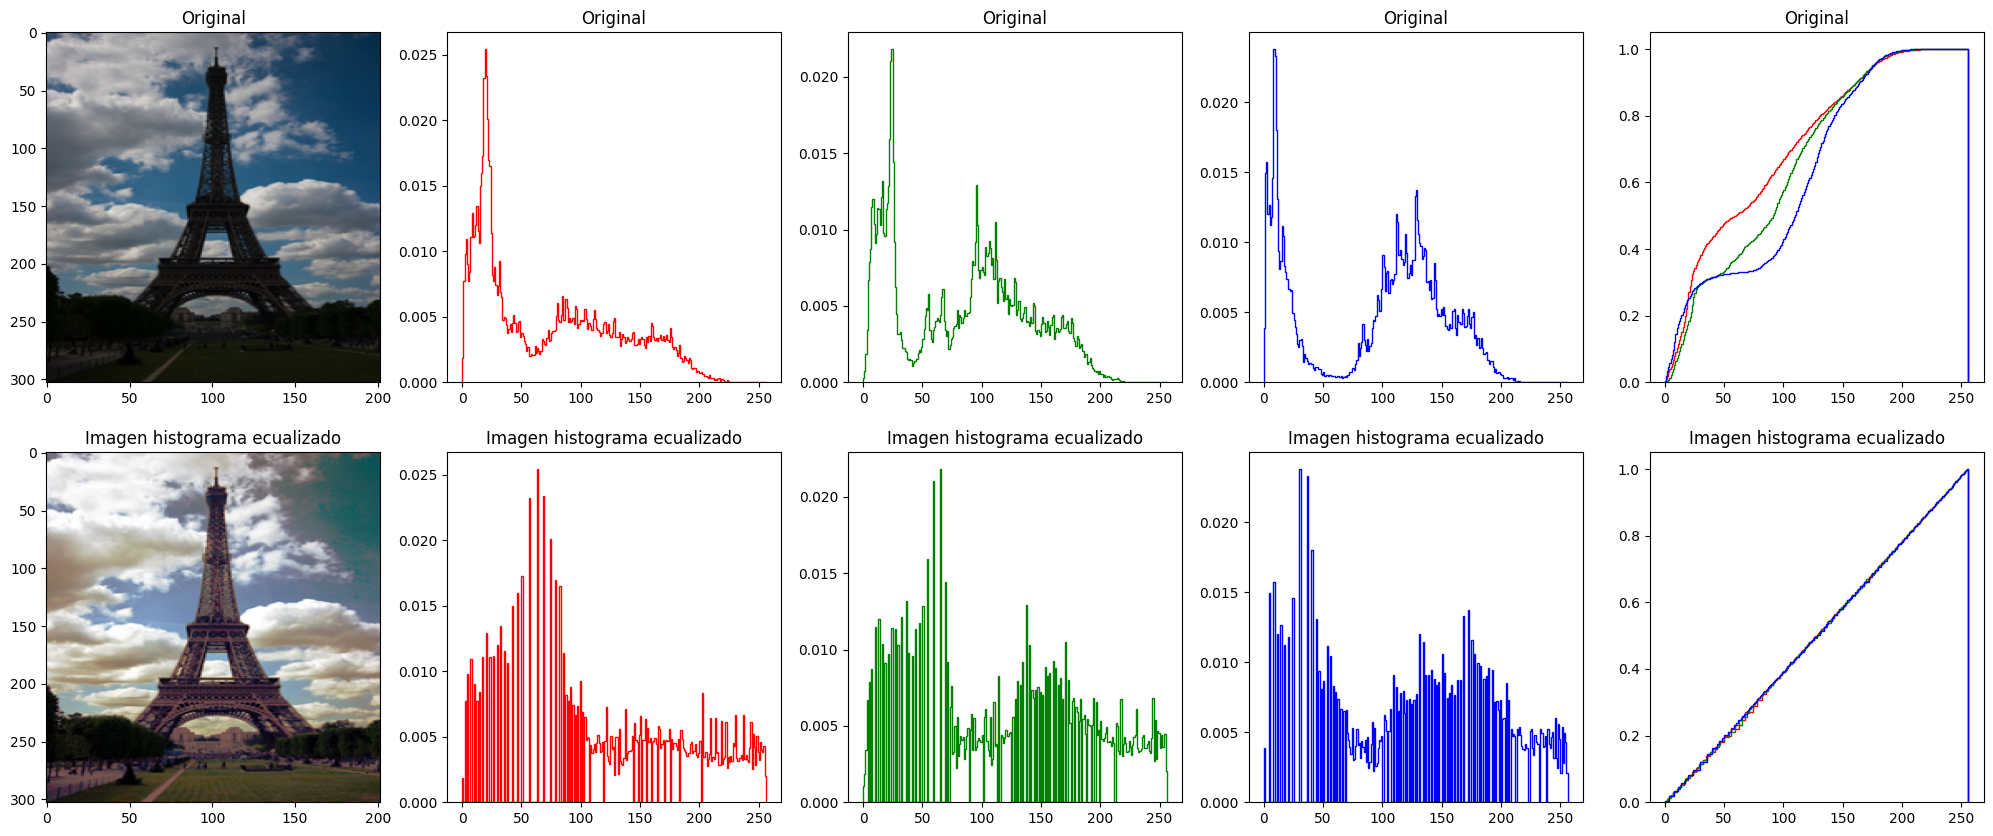

In [11]:
img = cv2.cvtColor(cv2.imread('imagenes/eiffel.png'), cv2.COLOR_BGR2RGB)
hist_ecualization = np.zeros(img.shape, np.uint8)
hist_ecualization[:,:,0] = cv2.equalizeHist(img[:,:,0])
hist_ecualization[:,:,1] = cv2.equalizeHist(img[:,:,1])
hist_ecualization[:,:,2] = cv2.equalizeHist(img[:,:,2])

imagenes_png = [img, hist_ecualization]
labels = ['Original', 'Imagen histograma ecualizado']

fig, axs = plt.subplots(2,5, figsize=(25, 10))
colors = ('r','g','b')

ax = axs.ravel()

contador = 0
for imagen, label in zip(imagenes_png, labels):
    ax[contador].set_title(label)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color)
        contador += 1
    for i, color in enumerate(colors):
        ax[contador].set_title(label)
        ax[contador].hist(imagen[:,:,i].ravel(), histtype='step', 
                          bins=256, range=(0.0, 256.0), density=True, color=color, cumulative=True)
    contador += 1

plt.show()